In [1]:
import soundfile as sf
import numpy as np
from scipy.signal import lfilter
from pydub import AudioSegment
from pydub import AudioSegment
from pydub.playback import play
import pygame
import time

def obtener_duracion_audio(ruta_archivo):
    audio = AudioSegment.from_file(ruta_archivo)
    duracion_ms = len(audio)
    duracion_seg = duracion_ms / 1000
    return duracion_seg

def calculate_snr(audio):
    # Calcular la relación señal a ruido (SNR)
    audio, sample_rate = sf.read(audio)
    signal_power = np.sum(audio ** 2)
    noise_power = np.sum(lfilter([1], [1, -0.99], audio) ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

def calculate_thd(audio):
    # Calcular la distorsión armónica total (THD)
    audiop, sample_rate = sf.read(audio)
    fundamental = np.max(audiop)
    harmonics = np.sqrt(np.sum(audiop ** 2)) - np.abs(fundamental)
    thd = 20 * np.log10(harmonics / fundamental)
    return thd

def promedio_potencia(audio_path):
    audio, sample_rate = sf.read(audio_path)
    # Calcular la energía promedio por muestra
    energy = np.sum(audio ** 2) / len(audio)
    # Calcular el nivel promedio de potencia (PMS)
    pms = 10 * np.log10(energy)
    return pms

def nivel_peak(audio_path):
    audio, sr = sf.read(audio_path)
    peak = 20 * np.log10(np.max(np.abs(audio)))
    return peak
    # Calcular la relación señal a ruido (SNR)
    #snr = calculate_snr(audio)

    # Calcular la distorsión armónica total (THD)
    #thd = calculate_thd(audio)

    # Imprimir los resultados
    #print("Promedio de nivel de potencia (PMS): ", pms)
    #print("Nivel de pico: ", peak)
    #print("Relación señal a ruido (SNR): ", snr)
    #print("Distorsión armónica total (THD): ", thd)

pygame 2.4.0 (SDL 2.26.4, Python 3.8.16)
Hello from the pygame community. https://www.pygame.org/contribute.html


C:\ProgramData\Anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
def evaluar_audio(a):
    if calculate_snr(a)>-3: 
        return False
    if calculate_thd(a)<29: 
        return False
    if promedio_potencia(a)<-53: 
        return False
    if nivel_peak(a)<-35:
        return False
    if obtener_duracion_audio(a)< 0.8:
        return False
    # Si todos los criterios se cumplen, el audio es de buena calidad
    return True

In [3]:
import os
directorio_inicial1 = r"D:\sentirobots\Datasets\MAFW\MAFW-20230614T154044Z-003\MAFW\data\Audibles"
archivos1=[]
duracion_a=[]
pasa=[]
pic=[]
mean_pot=[]
relacion_sr=[]
distorcion_armonicaT=[]
archi=[]
for raiz, carpetas, archivos_en_carpeta in os.walk(directorio_inicial1):
    for archivo in archivos_en_carpeta:
        archi.append(archivo)
        if os.path.isfile(os.path.join(raiz, archivo)):
            ruta_completa1 = os.path.join(raiz, archivo)
            archivos1.append(ruta_completa1)
            duracion = obtener_duracion_audio(ruta_completa1)
            prom_pot = promedio_potencia(ruta_completa1)
            peak = nivel_peak(ruta_completa1)
            rsr= calculate_snr(ruta_completa1)
            dat=calculate_thd(ruta_completa1)
            mean_pot.append(prom_pot)
            pic.append(peak)
            relacion_sr.append(rsr)
            distorcion_armonicaT.append(dat)
            duracion_a.append(duracion)
            #print("Duración del audio:", duracion, "segundos")
            if(evaluar_audio(ruta_completa1)):
                pasa.append(1)
            else:
                pasa.append(0)


C:\Users\Desarrollo\AppData\Local\Temp\ipykernel_28688\3767852857.py:46: RuntimeWarning: divide by zero encountered in log10
  pms = 10 * np.log10(energy)
C:\Users\Desarrollo\AppData\Local\Temp\ipykernel_28688\3767852857.py:55: RuntimeWarning: divide by zero encountered in log10
  peak = 20 * np.log10(np.max(np.abs(audio)))
C:\Users\Desarrollo\AppData\Local\Temp\ipykernel_28688\3767852857.py:27: RuntimeWarning: invalid value encountered in double_scalars
  snr = 10 * np.log10(signal_power / noise_power)
C:\Users\Desarrollo\AppData\Local\Temp\ipykernel_28688\3767852857.py:35: RuntimeWarning: invalid value encountered in double_scalars
  thd = 20 * np.log10(harmonics / fundamental)


In [4]:
import pandas as pd
#Real
archiv={"RutaArchivo": archivos1}
df= pd.DataFrame(archiv)
df["Nombre archivo"] = archi
df["duracion"] = duracion_a
df["Promedio level pot"] = mean_pot
df["Nivel peak"] = pic
df["Distorsión armónica total"] = distorcion_armonicaT
df["Relación señal a ruido"] = relacion_sr
df["Filtro"] = pasa
df

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro
0,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00019.wav,1.84,-21.864116,-7.560650,34.629384,-3.945293,1
1,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00020.wav,4.88,-23.990850,-8.933411,38.493229,-3.762745,1
2,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00021.wav,2.80,-31.076757,-15.335937,35.022400,-3.938453,1
3,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00022.wav,5.42,-31.247012,-16.262112,39.448311,-3.923652,1
4,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00024.wav,2.16,-29.237429,-13.203463,35.403899,-3.837866,1
...,...,...,...,...,...,...,...,...
9969,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,20094.wav,2.32,-34.401585,-16.795265,35.521142,-3.944418,1
9970,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,20095.wav,2.36,-39.765142,-25.463141,35.730654,-3.891278,1
9971,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,20096.wav,3.12,-37.872771,-24.301437,38.494210,-3.940927,1
9972,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,20097.wav,1.16,-34.496464,-18.233125,31.110974,-3.532099,1


In [5]:
condicion1 = df['duracion'] < 0.8
condicion2 = df['Promedio level pot'] <-53
condicion3 = df['Nivel peak'] <-35
condicion4 =  (df['Distorsión armónica total'] > 49) | (df['Distorsión armónica total'] < 29)
condicion5 = df['Relación señal a ruido'] > -3

df['Falla en'] = pd.concat([condicion1, condicion2, condicion3, condicion4, condicion5], axis=1).sum(axis=1)
df

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
0,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00019.wav,1.84,-21.864116,-7.560650,34.629384,-3.945293,1,0
1,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00020.wav,4.88,-23.990850,-8.933411,38.493229,-3.762745,1,0
2,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00021.wav,2.80,-31.076757,-15.335937,35.022400,-3.938453,1,0
3,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00022.wav,5.42,-31.247012,-16.262112,39.448311,-3.923652,1,0
4,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00024.wav,2.16,-29.237429,-13.203463,35.403899,-3.837866,1,0
...,...,...,...,...,...,...,...,...,...
9969,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,20094.wav,2.32,-34.401585,-16.795265,35.521142,-3.944418,1,0
9970,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,20095.wav,2.36,-39.765142,-25.463141,35.730654,-3.891278,1,0
9971,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,20096.wav,3.12,-37.872771,-24.301437,38.494210,-3.940927,1,0
9972,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,20097.wav,1.16,-34.496464,-18.233125,31.110974,-3.532099,1,0


In [6]:
conteo = df['Filtro'].value_counts()
print(conteo)

1    8759
0    1215
Name: Filtro, dtype: int64


In [7]:
df_fallas = df[df['Filtro'] == 0].copy()
df_buenas = df[df['Filtro'] == 1].copy()

In [8]:
df.describe()

,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
count,9974.000000,9974.000000,9974.000000,9973.000000,9973.000000,9974.000000,9974.000000
mean,9.311472,-inf,-inf,37.939424,-3.666850,0.878183,0.138861
std,95.952981,NaN,NaN,3.775485,0.531732,0.327090,0.387651
min,0.300000,-inf,-inf,1.840847,-4.127048,0.000000,0.000000
25%,2.380000,-31.141406,-16.097767,35.716468,-3.942162,1.000000,0.000000
50%,3.170000,-24.909537,-10.318124,38.052280,-3.905938,1.000000,0.000000
75%,4.610000,-19.246688,-5.288286,40.192094,-3.655558,1.000000,0.000000
max,3125.210000,-0.930299,-0.087382,71.817368,3.009536,1.000000,4.000000


In [9]:
duracion_df = df_fallas[df_fallas['duracion'] < 0.8].copy()
conteos = duracion_df['Filtro'].value_counts()
print(conteos)
duracion_df

0    22
Name: Filtro, dtype: int64


,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
580,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00708.wav,0.71,-24.357863,-14.105693,35.981367,-3.531011,0,1
2504,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,02894.wav,0.50,-27.185296,-19.190190,35.290878,-1.778734,0,2
5842,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,07546.wav,0.70,-28.257825,-14.385841,30.775597,-2.840063,0,2
5946,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,07651.wav,0.76,-24.449055,-13.415728,35.137767,-3.944025,0,1
5971,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,07678.wav,0.44,-33.184332,-24.406457,34.000166,-3.944604,0,1
5972,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,07679.wav,0.50,-30.113806,-20.865576,34.869146,-3.944604,0,1
6077,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,07788.wav,0.76,-20.488230,-5.974599,30.482883,-3.859575,0,1
6316,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,08037.wav,0.56,-16.999417,-2.862544,29.503320,-3.932172,0,1
6569,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,08292.wav,0.71,-13.923744,-4.099806,35.991201,-3.356414,0,1
6578,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,08301.wav,0.79,-38.889341,-22.988015,29.224068,-2.364991,0,2


In [10]:
duracion_df.describe()

,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.0,22.000000
mean,0.619545,-25.103859,-13.748047,33.170755,-3.555786,0.0,1.363636
std,0.152923,10.505960,9.103640,2.833860,0.634100,0.0,0.726731
min,0.300000,-59.069789,-40.680146,26.482226,-3.944615,0.0,1.000000
25%,0.485000,-29.649811,-18.869212,30.939224,-3.944597,0.0,1.000000
50%,0.705000,-23.787126,-13.023479,34.153808,-3.884353,0.0,1.000000
75%,0.747500,-18.222414,-7.998365,35.100958,-3.400063,0.0,1.750000
max,0.790000,-9.074375,-0.632405,36.658792,-1.778734,0.0,4.000000


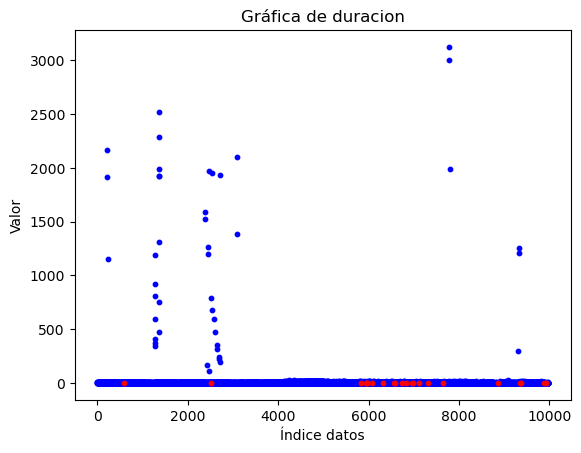

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

column_data = df['duracion']
plt.scatter(range(len(column_data)), column_data, s=10, color='blue')
plt.xlabel('Índice datos')
plt.ylabel('Valor')
plt.title('Gráfica de duracion')
mask = column_data < 0.8
plt.scatter(np.where(mask)[0], column_data[mask], s=10, color='red')
plt.show()

In [12]:
# from pydub import AudioSegment
# from pydub.playback import play
# import pygame
# import time

# lista = duracion_df['RutaArchivo'].tolist()

# pygame.init()
# pygame.mixer.init()

# for audio_path in lista:
#     # Cargar el archivo de audio
#     audio = AudioSegment.from_file(audio_path)

#     # Reproducir el audio
#     pygame.mixer.music.load(audio_path)
#     pygame.mixer.music.play()

#     # Mostrar el nombre del archivo que se está reproduciendo
#     print("Reproduciendo:", audio_path)

#     # Pausar la reproducción durante 5 segundos
#     time.sleep(5)
#     pygame.mixer.music.pause()

#     # Esperar 2 segundos
#     time.sleep(2)

#     # Reanudar la reproducción
#     pygame.mixer.music.unpause()

#     # Esperar 5 segundos antes de reproducir el siguiente archivo
#     time.sleep(5)

# # Detener la reproducción al finalizar
# pygame.mixer.music.stop()
# pygame.quit()

In [13]:
# Crear una copia del DataFrame original con la condición
pot_df = df_fallas[df_fallas['Promedio level pot'] <-53].copy()
conteosp = pot_df['Filtro'].value_counts()
print(conteosp)
pot_df

0    88
Name: Filtro, dtype: int64


,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
135,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00221.wav,3.17,-58.146092,-46.903764,40.127476,-3.389065,0,2
173,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00263.wav,3.56,-59.120685,-43.989592,36.701734,-2.404370,0,3
174,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00264.wav,2.90,-61.633049,-52.139298,41.501853,-3.635025,0,2
175,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00265.wav,5.18,-55.691897,-30.326388,31.165750,-3.817912,0,1
184,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00274.wav,1.97,-56.651457,-46.172481,38.865775,-3.219440,0,2
...,...,...,...,...,...,...,...,...,...
9459,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,15195.wav,7.53,-70.810606,-59.182949,43.526999,-3.944588,0,2
9465,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,15201.wav,5.38,-67.998983,-57.244748,42.936249,-3.944604,0,2
9620,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,15357.wav,5.67,-53.537330,-36.558419,37.751311,-3.565871,0,2
9694,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,15432.wav,3.17,-62.229522,-52.692727,41.848255,-2.571571,0,3


In [14]:
pot_df.describe()

,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
count,88.000000,88.000000,88.000000,87.000000,87.000000,88.0,88.000000
mean,88.060000,-inf,-inf,35.397681,-3.509664,0.0,2.056818
std,459.460234,NaN,NaN,5.999869,0.616696,0.0,0.594186
min,0.750000,-inf,-inf,1.840847,-3.944605,0.0,1.000000
25%,2.327500,-60.050281,-45.349952,31.870566,-3.903207,0.0,2.000000
50%,3.155000,-56.531504,-42.668733,36.481712,-3.726907,0.0,2.000000
75%,4.040000,-54.586919,-37.060569,39.210746,-3.283653,0.0,2.000000
max,2999.780000,-53.053687,-8.174984,44.584553,0.000000,0.0,4.000000


In [15]:
# lista = pot_df['RutaArchivo'].tolist()

# pygame.init()
# pygame.mixer.init()

# for audio_path in lista:
#     # Cargar el archivo de audio
#     audio = AudioSegment.from_file(audio_path)

#     # Reproducir el audio
#     pygame.mixer.music.load(audio_path)
#     pygame.mixer.music.play()

#     # Mostrar el nombre del archivo que se está reproduciendo
#     print("Reproduciendo:", audio_path)

#     # Pausar la reproducción durante 5 segundos
#  #   time.sleep(5)
#   #  pygame.mixer.music.pause()

#     # Esperar 2 segundos
#     time.sleep(2)

#     # Reanudar la reproducción
#     pygame.mixer.music.unpause()

#     # Esperar 5 segundos antes de reproducir el siguiente archivo
#     time.sleep(1)

# # Detener la reproducción al finalizar
# pygame.mixer.music.stop()
# pygame.quit()

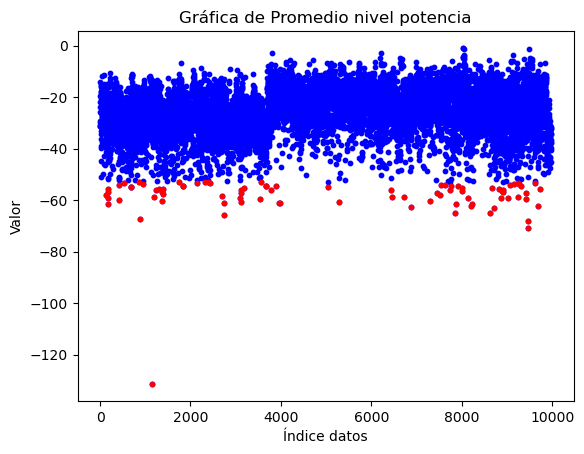

In [16]:
column_data = df['Promedio level pot']
plt.scatter(range(len(column_data)), column_data, s=10, color='blue')
plt.xlabel('Índice datos')
plt.ylabel('Valor')
plt.title('Gráfica de Promedio nivel potencia')
mask = column_data <-53
plt.scatter(np.where(mask)[0], column_data[mask], s=10, color='red')
plt.show()

In [17]:
peak_df = df_fallas[df_fallas['Nivel peak'] <-35].copy()
conteospp = peak_df['Filtro'].value_counts()
print(conteospp)
peak_df

0    149
Name: Filtro, dtype: int64


,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
14,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00036.wav,2.88,-44.733513,-35.115642,42.093126,-1.073460,0,2
59,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00105.wav,2.59,-49.798854,-38.181371,38.861437,-3.282358,0,1
114,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00192.wav,2.28,-46.398548,-36.312244,39.849456,-3.552569,0,1
135,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00221.wav,3.17,-58.146092,-46.903764,40.127476,-3.389065,0,2
166,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00256.wav,3.81,-51.269003,-35.314272,37.702362,-3.857567,0,1
...,...,...,...,...,...,...,...,...,...
9693,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,15431.wav,3.37,-47.655219,-37.361339,42.310486,-3.187967,0,1
9694,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,15432.wav,3.17,-62.229522,-52.692727,41.848255,-2.571571,0,3
9726,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,15464.wav,7.80,-55.608647,-35.938965,35.551896,-2.989792,0,3
9805,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,15543.wav,3.42,-49.533878,-37.559204,39.720736,-2.550318,0,2


In [18]:
peak_df.describe()

,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
count,149.000000,149.000000,149.000000,148.000000,148.000000,149.0,149.000000
mean,19.287517,-inf,-inf,38.739658,-3.370870,0.0,1.711409
std,178.024551,NaN,NaN,5.743463,0.703764,0.0,0.670773
min,0.750000,-inf,-inf,1.840847,-4.019106,0.0,1.000000
25%,2.250000,-57.406175,-43.188482,36.556309,-3.868284,0.0,1.000000
50%,2.690000,-52.620548,-40.178898,39.267574,-3.587990,0.0,2.000000
75%,3.480000,-49.586375,-37.283438,41.131050,-3.132549,0.0,2.000000
max,2165.040000,-41.587549,-35.010539,71.817368,0.604449,0.0,4.000000


In [19]:
# lista = peak_df['RutaArchivo'].tolist()

# pygame.init()
# pygame.mixer.init()

# for audio_path in lista:
#     # Cargar el archivo de audio
#     audio = AudioSegment.from_file(audio_path)

#     # Reproducir el audio
#     pygame.mixer.music.load(audio_path)
#     pygame.mixer.music.play()

#     # Mostrar el nombre del archivo que se está reproduciendo
#     print("Reproduciendo:", audio_path)

#     # Pausar la reproducción durante 5 segundos
#  #   time.sleep(5)
#   #  pygame.mixer.music.pause()

#     # Esperar 2 segundos
#     time.sleep(2)

#     # Reanudar la reproducción
#     pygame.mixer.music.unpause()

#     # Esperar 5 segundos antes de reproducir el siguiente archivo
#     time.sleep(1)

# # Detener la reproducción al finalizar
# pygame.mixer.music.stop()
# pygame.quit()

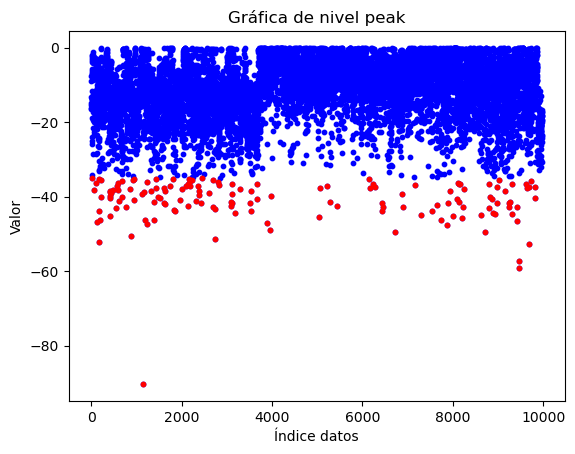

In [20]:
column_data = df['Nivel peak']
plt.scatter(range(len(column_data)), column_data, s=10, color='blue')
plt.xlabel('Índice datos')
plt.ylabel('Valor')
plt.title('Gráfica de nivel peak')
mask = column_data <-35
plt.scatter(np.where(mask)[0], column_data[mask], s=10, color='red')
plt.show()

In [21]:
dis_df = df_fallas[(df_fallas['Distorsión armónica total'] > 43) | (df_fallas['Distorsión armónica total'] < 29)].copy()
conteosppd = dis_df['Filtro'].value_counts()
print(conteosppd)
dis_df

0    250
Name: Filtro, dtype: int64


,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
40,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00076.wav,1.63,-34.091542,-12.709887,26.796226,-3.903654,0,1
96,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00160.wav,2.54,-45.959932,-23.523946,28.428932,-3.931169,0,1
164,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00254.wav,4.04,-26.774398,-16.512171,43.251504,-2.563146,0,1
168,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00258.wav,5.80,-31.107938,-20.487370,43.399569,-2.129434,0,1
183,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00273.wav,4.96,-36.510356,-26.666414,43.819390,-2.338507,0,1
...,...,...,...,...,...,...,...,...,...
9624,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,15361.wav,1.42,-41.657819,-19.983581,25.861608,-3.924523,0,1
9690,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,15428.wav,1.96,-40.697229,-14.980742,24.184967,-3.940449,0,1
9733,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,15471.wav,2.38,-7.005320,-0.244629,43.390876,-2.876961,0,1
9826,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,15564.wav,1.88,-34.608332,-14.234395,28.751155,-0.835957,0,2


In [22]:
dis_df.describe()

,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.0,250.000000
mean,43.064920,-32.489631,-15.652956,36.244032,-3.017276,0.0,1.188000
std,254.618167,14.607501,12.313416,10.366819,0.957331,0.0,0.507629
min,0.440000,-131.317045,-90.308999,1.840847,-4.059939,0.0,1.000000
25%,2.470000,-41.657381,-21.277895,27.658305,-3.900165,0.0,1.000000
50%,3.675000,-31.762207,-13.224236,36.004685,-3.055595,0.0,1.000000
75%,5.597500,-22.963023,-6.822437,44.171219,-2.482358,0.0,1.000000
max,2165.040000,-4.367862,-0.087382,71.817368,0.604449,0.0,4.000000


In [23]:
lista = dis_df['RutaArchivo'].tolist()

pygame.init()
pygame.mixer.init()

for audio_path in lista:
    audio = AudioSegment.from_file(audio_path)
    pygame.mixer.music.load(audio_path)
    pygame.mixer.music.play()
    print("Reproduciendo:", audio_path)
    time.sleep(2)
    pygame.mixer.music.unpause()
    time.sleep(1)

pygame.mixer.music.stop()
pygame.quit()

Reproduciendo: D:\sentirobots\Datasets\MAFW\MAFW-20230614T154044Z-003\MAFW\data\Audibles\00076.wav
Reproduciendo: D:\sentirobots\Datasets\MAFW\MAFW-20230614T154044Z-003\MAFW\data\Audibles\00160.wav
Reproduciendo: D:\sentirobots\Datasets\MAFW\MAFW-20230614T154044Z-003\MAFW\data\Audibles\00254.wav
Reproduciendo: D:\sentirobots\Datasets\MAFW\MAFW-20230614T154044Z-003\MAFW\data\Audibles\00258.wav
Reproduciendo: D:\sentirobots\Datasets\MAFW\MAFW-20230614T154044Z-003\MAFW\data\Audibles\00273.wav
Reproduciendo: D:\sentirobots\Datasets\MAFW\MAFW-20230614T154044Z-003\MAFW\data\Audibles\00314.wav
Reproduciendo: D:\sentirobots\Datasets\MAFW\MAFW-20230614T154044Z-003\MAFW\data\Audibles\00319.wav
Reproduciendo: D:\sentirobots\Datasets\MAFW\MAFW-20230614T154044Z-003\MAFW\data\Audibles\00323.wav
Reproduciendo: D:\sentirobots\Datasets\MAFW\MAFW-20230614T154044Z-003\MAFW\data\Audibles\00458.wav
Reproduciendo: D:\sentirobots\Datasets\MAFW\MAFW-20230614T154044Z-003\MAFW\data\Audibles\00487.wav
Reproducie

KeyboardInterrupt: 

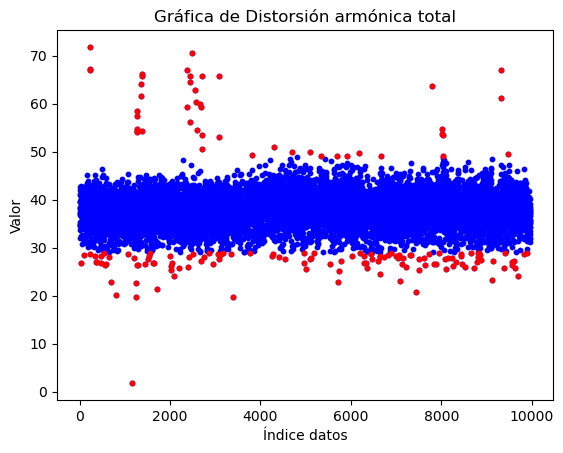

In [24]:
column_data = df['Distorsión armónica total']
plt.scatter(range(len(column_data)), column_data, s=10, color='blue')
plt.xlabel('Índice datos')
plt.ylabel('Valor')
plt.title('Gráfica de Distorsión armónica total')
mask = (column_data > 49) | (column_data < 29)
plt.scatter(np.where(mask)[0], column_data[mask], s=10, color='red')
plt.show()

In [25]:
rsr_df = df_fallas[df_fallas['Relación señal a ruido'] > -3].copy()
conteosppde = rsr_df['Filtro'].value_counts()
print(conteosppde)
rsr_df

0    955
Name: Filtro, dtype: int64


,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
7,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00027.wav,2.71,-19.757602,-6.212496,37.108643,-2.870357,0,1
11,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00031.wav,0.93,-18.575113,-5.708711,34.425065,-2.915073,0,1
14,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00036.wav,2.88,-44.733513,-35.115642,42.093126,-1.073460,0,2
24,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00051.wav,2.33,-34.265573,-23.939384,39.702331,-2.684758,0,1
34,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00068.wav,3.75,-18.828970,-4.005131,37.242357,-2.526854,0,1
...,...,...,...,...,...,...,...,...,...
9851,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,15589.wav,1.96,-18.497953,-8.822912,39.601441,-2.661922,0,1
9856,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,15594.wav,2.08,-12.355186,-5.196313,42.550433,-2.168478,0,1
9857,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,15595.wav,3.50,-39.148096,-24.588856,37.206841,-1.865876,0,1
9860,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,15598.wav,3.18,-25.070980,-12.300564,40.629809,-2.142236,0,1


In [26]:
rsr_df.describe()

,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
count,955.000000,955.000000,955.000000,955.000000,955.000000,955.0,955.000000
mean,16.833812,-26.791562,-14.177579,39.567815,-2.308599,0.0,1.062827
std,162.819428,10.079565,9.601299,4.225595,0.683833,0.0,0.289998
min,0.370000,-131.317045,-90.308999,1.840847,-2.999114,0.0,1.000000
25%,2.420000,-32.508643,-20.094083,37.639644,-2.794931,0.0,1.000000
50%,3.170000,-26.151490,-12.824002,39.916960,-2.521095,0.0,1.000000
75%,4.380000,-19.868028,-6.952909,41.587358,-2.040171,0.0,1.000000
max,2999.780000,-4.367862,-0.087382,71.817368,3.009536,0.0,4.000000


In [27]:
# lista = rsr_df['RutaArchivo'].tolist()

# pygame.init()
# pygame.mixer.init()

# for audio_path in lista:
#     # Cargar el archivo de audio
#     audio = AudioSegment.from_file(audio_path)

#     # Reproducir el audio
#     pygame.mixer.music.load(audio_path)
#     pygame.mixer.music.play()

#     # Mostrar el nombre del archivo que se está reproduciendo
#     print("Reproduciendo:", audio_path)

#     # Pausar la reproducción durante 5 segundos
#  #   time.sleep(5)
#   #  pygame.mixer.music.pause()

#     # Esperar 2 segundos
#     time.sleep(2)

#     # Reanudar la reproducción
#     pygame.mixer.music.unpause()

#     # Esperar 5 segundos antes de reproducir el siguiente archivo
#     time.sleep(1)

# # Detener la reproducción al finalizar
# pygame.mixer.music.stop()

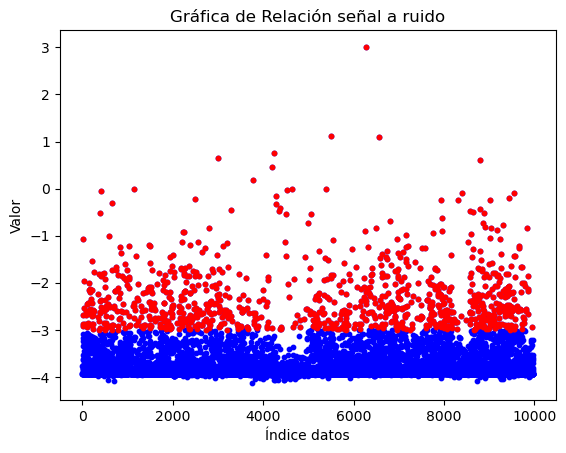

In [28]:
column_data = df['Relación señal a ruido']
plt.scatter(range(len(column_data)), column_data, s=10, color='blue')
plt.xlabel('Índice datos')
plt.ylabel('Valor')
plt.title('Gráfica de Relación señal a ruido')
mask = column_data > -3
plt.scatter(np.where(mask)[0], column_data[mask], s=10, color='red')
plt.show()

In [29]:
# lista = df_fallas['RutaArchivo'].tolist()

# pygame.init()
# pygame.mixer.init()

# for audio_path in lista:
#     # Cargar el archivo de audio
#     audio = AudioSegment.from_file(audio_path)

#     # Reproducir el audio
#     pygame.mixer.music.load(audio_path)
#     pygame.mixer.music.play()

#     # Mostrar el nombre del archivo que se está reproduciendo
#     print("Reproduciendo:", audio_path)

#     # Pausar la reproducción durante 5 segundos
#     #time.sleep(5)
#     #pygame.mixer.music.pause()

#     # Esperar 2 segundos
#     time.sleep(2)

#     # Reanudar la reproducción
#     pygame.mixer.music.unpause()

#     # Esperar 5 segundos antes de reproducir el siguiente archivo
#     time.sleep(1)

# # Detener la reproducción al finalizar
# pygame.mixer.music.stop()
# pygame.quit()

In [30]:
df_fallas

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
7,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00027.wav,2.71,-19.757602,-6.212496,37.108643,-2.870357,0,1
11,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00031.wav,0.93,-18.575113,-5.708711,34.425065,-2.915073,0,1
14,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00036.wav,2.88,-44.733513,-35.115642,42.093126,-1.073460,0,2
24,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00051.wav,2.33,-34.265573,-23.939384,39.702331,-2.684758,0,1
34,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00068.wav,3.75,-18.828970,-4.005131,37.242357,-2.526854,0,1
...,...,...,...,...,...,...,...,...,...
9860,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,15598.wav,3.18,-25.070980,-12.300564,40.629809,-2.142236,0,1
9884,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,20008.wav,0.68,-34.461077,-22.759231,34.292960,-3.868813,0,1
9907,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,20031.wav,1.92,-42.592373,-22.462096,28.838698,-3.926562,0,1
9932,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,20056.wav,0.76,-21.098281,-12.631230,36.658792,-3.261639,0,1


In [31]:
df_buenas

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
0,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00019.wav,1.84,-21.864116,-7.560650,34.629384,-3.945293,1,0
1,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00020.wav,4.88,-23.990850,-8.933411,38.493229,-3.762745,1,0
2,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00021.wav,2.80,-31.076757,-15.335937,35.022400,-3.938453,1,0
3,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00022.wav,5.42,-31.247012,-16.262112,39.448311,-3.923652,1,0
4,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00024.wav,2.16,-29.237429,-13.203463,35.403899,-3.837866,1,0
...,...,...,...,...,...,...,...,...,...
9969,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,20094.wav,2.32,-34.401585,-16.795265,35.521142,-3.944418,1,0
9970,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,20095.wav,2.36,-39.765142,-25.463141,35.730654,-3.891278,1,0
9971,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,20096.wav,3.12,-37.872771,-24.301437,38.494210,-3.940927,1,0
9972,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,20097.wav,1.16,-34.496464,-18.233125,31.110974,-3.532099,1,0


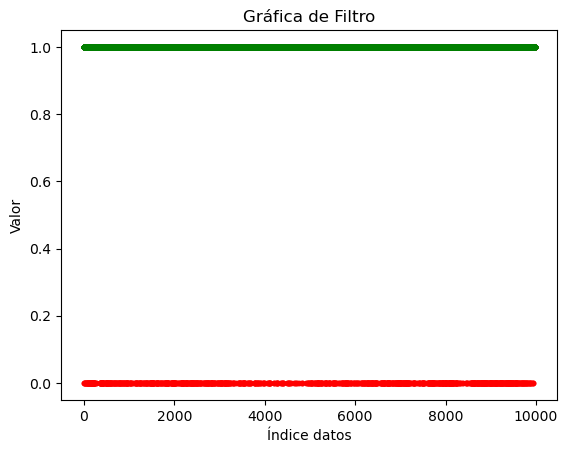

In [32]:
column_data = df['Filtro']
plt.scatter(range(len(column_data)), column_data, s=10, color='red')
plt.xlabel('Índice datos')
plt.ylabel('Valor')
plt.title('Gráfica de Filtro')
mask = column_data > 0
plt.scatter(np.where(mask)[0], column_data[mask], s=10, color='green')
plt.show()

In [33]:
df_fallas.describe()

,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
count,1215.000000,1215.000000,1215.000000,1214.000000,1214.000000,1215.0,1215.000000
mean,17.736387,-inf,-inf,38.157082,-2.610784,0.0,1.110288
std,170.489929,NaN,NaN,5.473130,0.848432,0.0,0.359871
min,0.300000,-inf,-inf,1.840847,-4.059939,0.0,1.000000
25%,2.340000,-37.874717,-22.974943,36.010840,-2.964559,0.0,1.000000
50%,3.040000,-28.726132,-14.603826,39.344503,-2.662169,0.0,1.000000
75%,4.260000,-21.526695,-7.920275,41.257005,-2.193778,0.0,1.000000
max,2999.780000,-4.367862,-0.087382,71.817368,3.009536,0.0,4.000000


In [34]:
condicion = (df_fallas['Falla en'] <= 1) & (df_fallas['Relación señal a ruido'] <= -3)
df_fallas['Filtro2'] = condicion.astype(int)
df_fallas.loc[condicion, 'Filtro2'] = 1
df_fallas

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2
7,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00027.wav,2.71,-19.757602,-6.212496,37.108643,-2.870357,0,1,0
11,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00031.wav,0.93,-18.575113,-5.708711,34.425065,-2.915073,0,1,0
14,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00036.wav,2.88,-44.733513,-35.115642,42.093126,-1.073460,0,2,0
24,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00051.wav,2.33,-34.265573,-23.939384,39.702331,-2.684758,0,1,0
34,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00068.wav,3.75,-18.828970,-4.005131,37.242357,-2.526854,0,1,0
...,...,...,...,...,...,...,...,...,...,...
9860,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,15598.wav,3.18,-25.070980,-12.300564,40.629809,-2.142236,0,1,0
9884,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,20008.wav,0.68,-34.461077,-22.759231,34.292960,-3.868813,0,1,1
9907,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,20031.wav,1.92,-42.592373,-22.462096,28.838698,-3.926562,0,1,1
9932,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,20056.wav,0.76,-21.098281,-12.631230,36.658792,-3.261639,0,1,1


In [35]:
contars = df_fallas['Filtro2'].value_counts()
print(contars)

0    1023
1     192
Name: Filtro2, dtype: int64


In [36]:
df_fallas2 = df_fallas[df_fallas['Filtro2'] == 0].copy()
df_buenas2 = df_fallas[df_fallas['Filtro2'] == 1].copy()

In [37]:
df_buenas2

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2
40,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00076.wav,1.63,-34.091542,-12.709887,26.796226,-3.903654,0,1,1
59,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00105.wav,2.59,-49.798854,-38.181371,38.861437,-3.282358,0,1,1
96,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00160.wav,2.54,-45.959932,-23.523946,28.428932,-3.931169,0,1,1
114,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00192.wav,2.28,-46.398548,-36.312244,39.849456,-3.552569,0,1,1
166,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00256.wav,3.81,-51.269003,-35.314272,37.702362,-3.857567,0,1,1
...,...,...,...,...,...,...,...,...,...,...
9693,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,15431.wav,3.37,-47.655219,-37.361339,42.310486,-3.187967,0,1,1
9811,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,15549.wav,1.92,-49.921837,-40.260456,39.524754,-3.529125,0,1,1
9884,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,20008.wav,0.68,-34.461077,-22.759231,34.292960,-3.868813,0,1,1
9907,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,20031.wav,1.92,-42.592373,-22.462096,28.838698,-3.926562,0,1,1


In [38]:
# lista = df_buenas2['RutaArchivo'].tolist()

# pygame.init()
# pygame.mixer.init()

# for audio_path in lista:
#     # Cargar el archivo de audio
#     audio = AudioSegment.from_file(audio_path)

#     # Reproducir el audio
#     pygame.mixer.music.load(audio_path)
#     pygame.mixer.music.play()

#     # Mostrar el nombre del archivo que se está reproduciendo
#     print("Reproduciendo:", audio_path)

#     # Pausar la reproducción durante 5 segundos
#     #time.sleep(5)
#     #pygame.mixer.music.pause()

#     # Esperar 2 segundos
#     time.sleep(2)

#     # Reanudar la reproducción
#     pygame.mixer.music.unpause()

#     # Esperar 5 segundos antes de reproducir el siguiente archivo
#     time.sleep(1)

# # Detener la reproducción al finalizar
# pygame.mixer.music.stop()
# pygame.quit()

In [39]:
condi = (df['Falla en'] <= 1) & (df['Relación señal a ruido'] <= -3)
df['Filtro2'] = condi.astype(int)
df.loc[condi, 'Filtro2'] = 1
df

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2
0,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00019.wav,1.84,-21.864116,-7.560650,34.629384,-3.945293,1,0,1
1,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00020.wav,4.88,-23.990850,-8.933411,38.493229,-3.762745,1,0,1
2,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00021.wav,2.80,-31.076757,-15.335937,35.022400,-3.938453,1,0,1
3,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00022.wav,5.42,-31.247012,-16.262112,39.448311,-3.923652,1,0,1
4,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,00024.wav,2.16,-29.237429,-13.203463,35.403899,-3.837866,1,0,1
...,...,...,...,...,...,...,...,...,...,...
9969,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,20094.wav,2.32,-34.401585,-16.795265,35.521142,-3.944418,1,0,1
9970,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,20095.wav,2.36,-39.765142,-25.463141,35.730654,-3.891278,1,0,1
9971,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,20096.wav,3.12,-37.872771,-24.301437,38.494210,-3.940927,1,0,1
9972,D:\sentirobots\Datasets\MAFW\MAFW-20230614T154...,20097.wav,1.16,-34.496464,-18.233125,31.110974,-3.532099,1,0,1


In [40]:
contars2 = df['Filtro2'].value_counts()
print(contars2)

1    8951
0    1023
Name: Filtro2, dtype: int64


In [41]:
df.to_csv(r"D:\sentirobots\Datasets\MAFW\MAFW-20230614T154044Z-003\MAFW\data\Filtro de audios - MAFW\filtro-audio-MAFW.csv", index=False)
print("Se ha generado el archivo")

Se ha generado el archivo
